# Prepare a classification model using SVM for salary data

In [2]:
# Importing the required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve, roc_auc_score
from sklearn.metrics import recall_score , precision_score, f1_score

In [3]:
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN

In [4]:
# load the data set 'SalaryData_Train.csv' and 'SalaryData_Test.csv'
df_train = pd.read_csv('SalaryData_Train.csv')
df_test = pd.read_csv('SalaryData_Test.csv')

In [5]:
df_train.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [6]:
df_train.shape

(30161, 14)

In [7]:
df_test.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [8]:
df_test.shape

(15060, 14)

In [9]:
# Combine the both data sets
df = df_train.append(df_test)
df.reset_index(inplace = True,drop = True)
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df.shape

(45221, 14)

About the Dataset
Attribute Information:
Data Description:
age -- age of a person
workclass -- A work class is a grouping of work
education -- Education of an individuals
maritalstatus -- Marital status of an individulas
occupation -- occupation of an individuals
race -- Race of an Individual
relationship--
sex -- Gender of an Individual
capitalgain -- profit received from the sale of an investment
capitalloss -- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week
native -- Native of an individual
Salary -- salary of an individual

In [11]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [12]:
df[df.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
45210,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
45213,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
45214,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


# There can be duplicated values as there are so many labels in the data for categorical features

# No null values in the data set

# Numerical variables

In [13]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [14]:
# Visualize the numerical features
df[numerical_features].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


# Categorical features

In [15]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [16]:
categorical_features

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

# Frequency count of categorical variables

In [17]:
for i in categorical_features:
    print(df[i].value_counts())

 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales           

# Checking for the cardinality(labels)
# The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [18]:
# checking for cardinality in categorical variables
for i in categorical_features:
    print(i,'contains',len(df[i].unique()),'labels')

workclass contains 7 labels
education contains 16 labels
maritalstatus contains 7 labels
occupation contains 14 labels
relationship contains 6 labels
race contains 5 labels
sex contains 2 labels
native contains 40 labels
Salary contains 2 labels


# As we can see Native,education, occupation contains more labels(Having high cordinality)

# Statistical summary of the data

In [19]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# As we can see almost 50% of the population are in the age group 28 and 47

In [20]:
# Correlation between the numarical features

In [21]:
corel = df.corr().round(2)

In [22]:
corel

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.00,0.04,0.08,0.06,0.10
educationno,0.04,1.00,0.13,0.08,0.15
capitalgain,0.08,0.13,1.00,-0.03,0.08
capitalloss,0.06,0.08,-0.03,1.00,0.05
hoursperweek,0.10,0.15,0.08,0.05,1.00


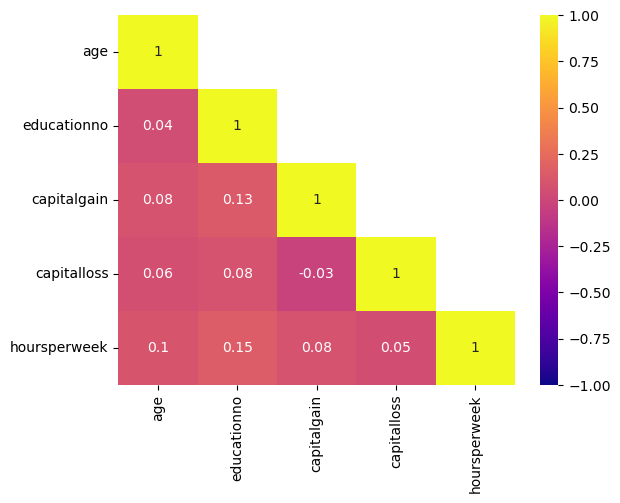

In [23]:
# Visualization using heatmap
sns.heatmap(data = corel,vmin = -1, vmax = +1,annot = True,cmap = 'plasma',mask = np.triu(corel,1));

# As we can see there is no strong correlation between the numerical features

# Visualization of numerical features

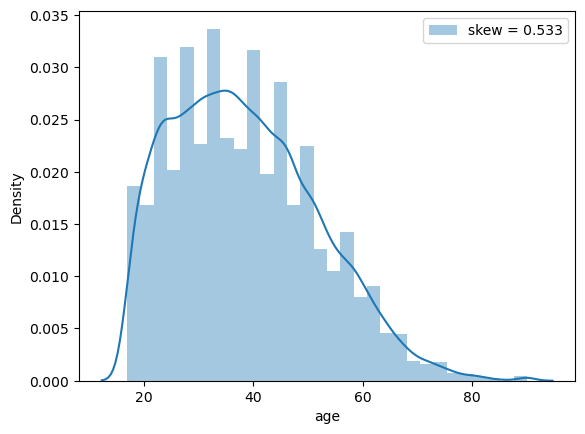

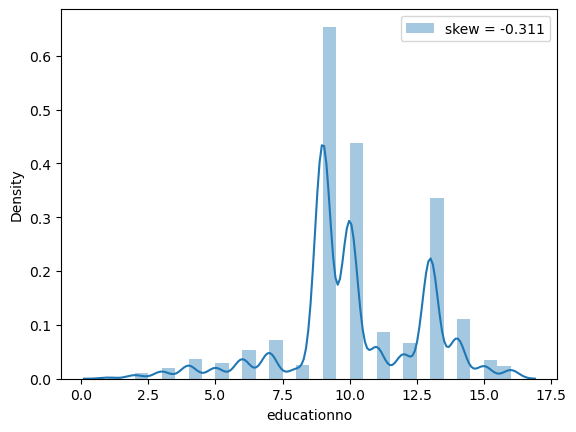

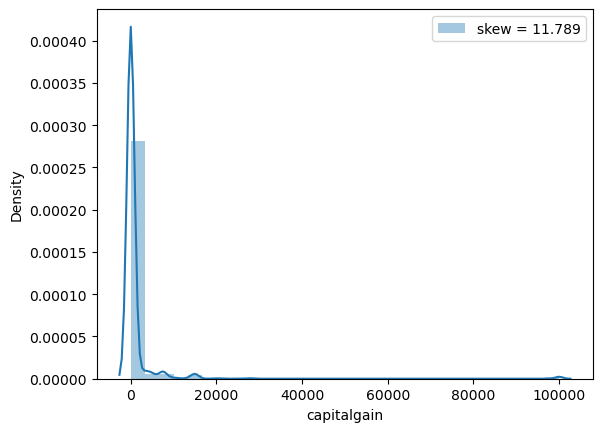

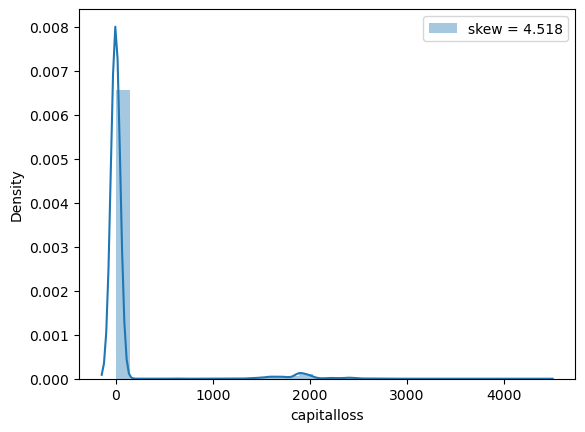

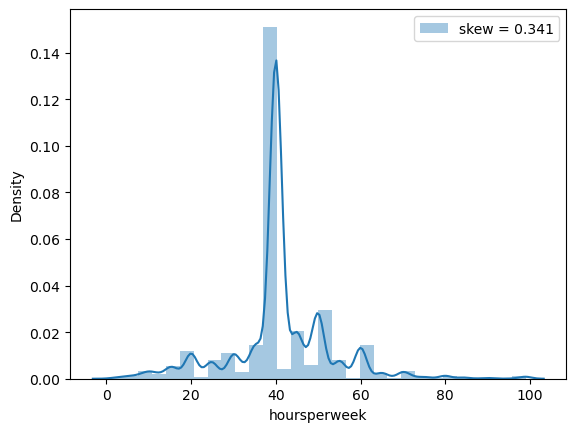

In [24]:
for i in numerical_features:
    skew = df[i].skew()
    sns.distplot(df[i],kde = True,bins = 30,label = 'skew = %.3f' %(skew))
    plt.legend()
    plt.show()


# As we can see from the above , Capital loss and Capital gain having high skewness

# Finding outliers by boxplot visualization

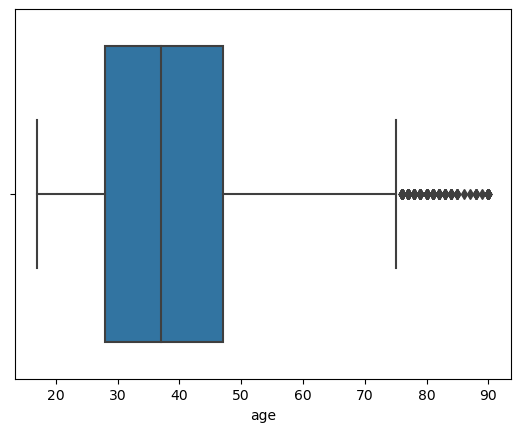

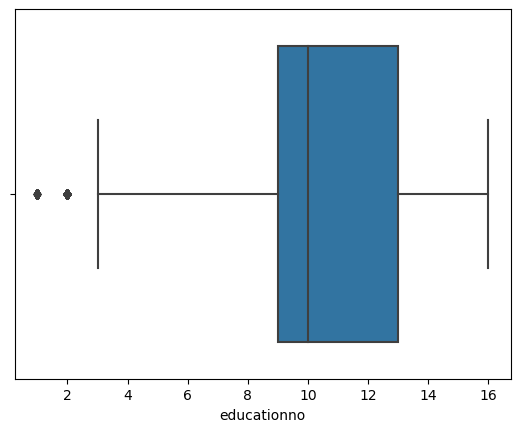

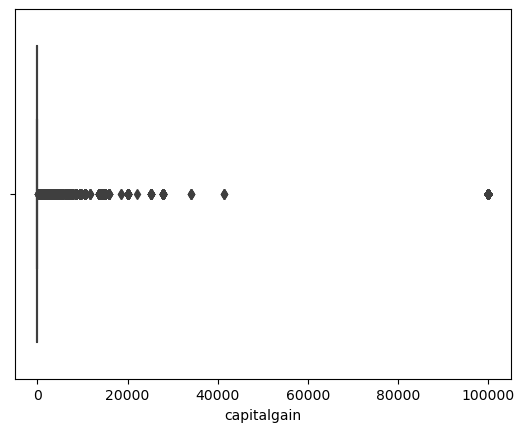

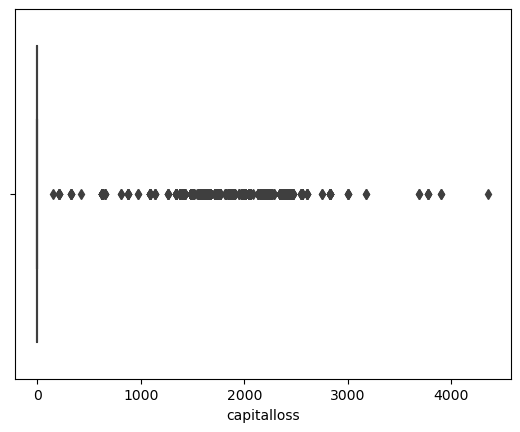

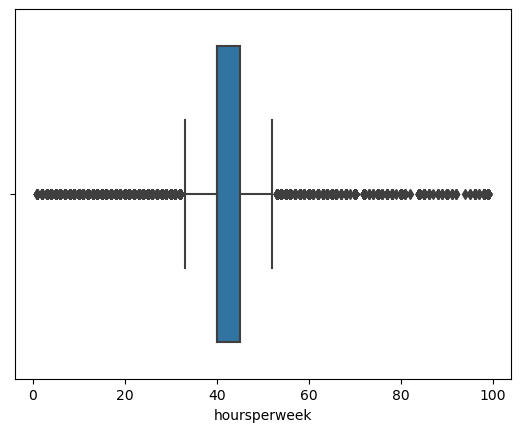

In [25]:
for i in numerical_features:
    sns.boxplot(data = df,x = df[i])
    plt.show()

# From the above, we can see that there are many outliers in the data

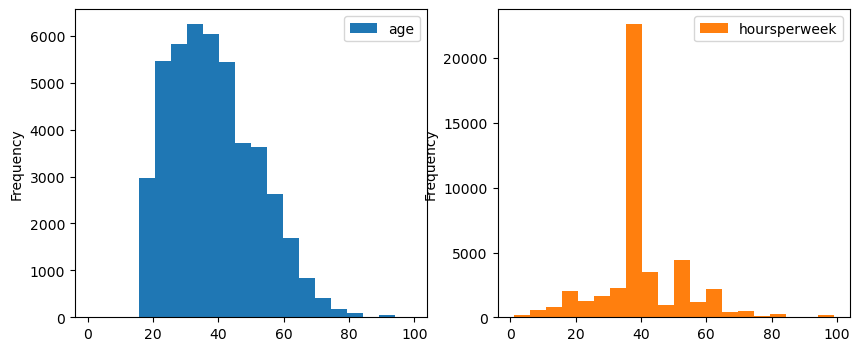

In [26]:
# HISTOGRAM OF 'AGE', and 'HOURS PER WEEK'
df[['age', 'hoursperweek']].plot(kind='hist', subplots=True, layout=(1, 2), figsize=(10, 4), sharex=False,bins = 20);

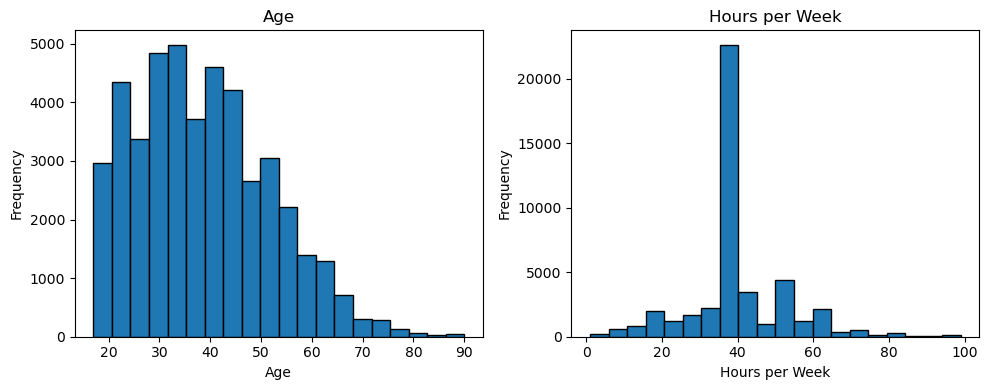

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot histogram for 'age'
axes[0].hist(df['age'], bins=20, edgecolor='black')
axes[0].set_title('Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot histogram for 'hoursperweek'
axes[1].hist(df['hoursperweek'], bins=20, edgecolor='black')
axes[1].set_title('Hours per Week')
axes[1].set_xlabel('Hours per Week')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

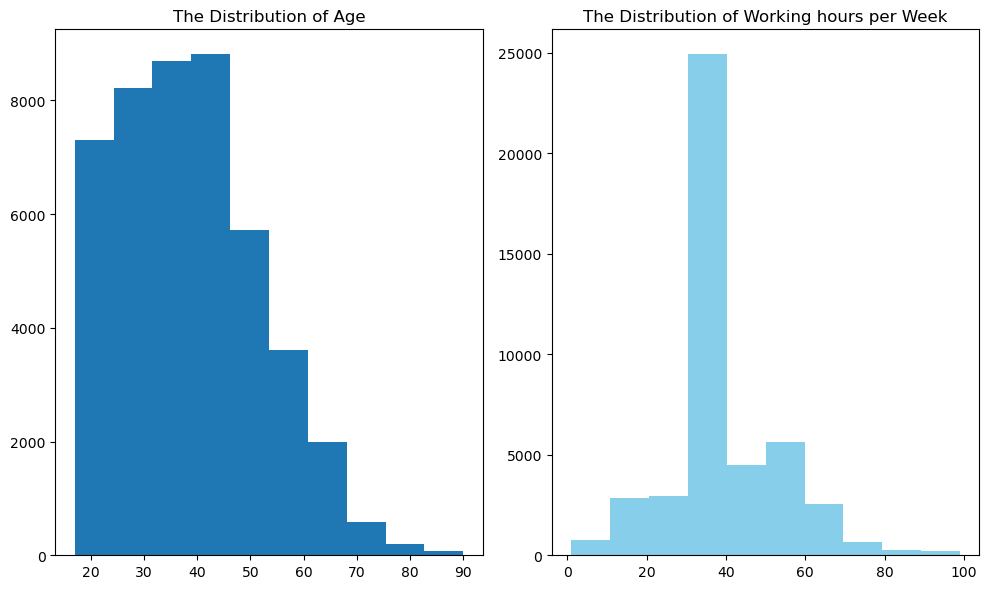

In [28]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(df['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(df['hoursperweek'], color = 'skyblue')
ra2.set_title('The Distribution of Working hours per Week')

plt.tight_layout() 
plt.show()

# Visualization of categorical features

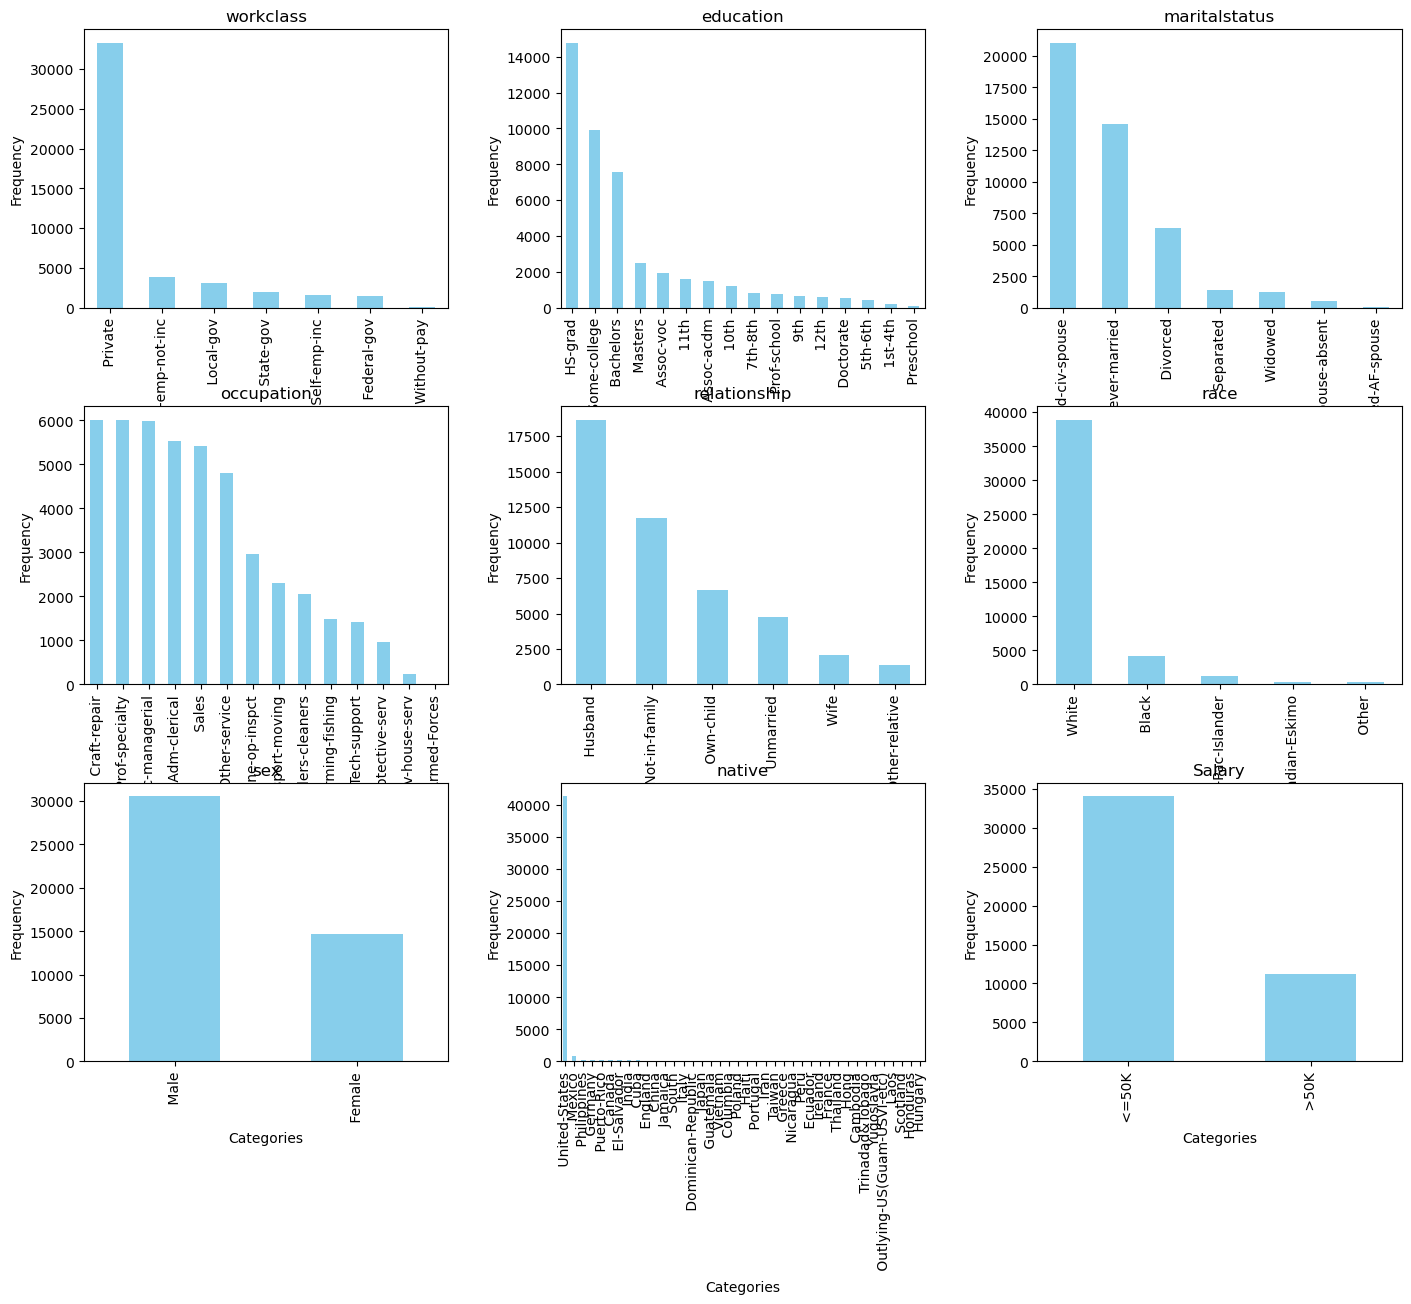

In [29]:
# List of categorical features
categorical_features = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.tight_layout(pad=5.0)

# Iterate through each categorical feature and plot bar chart
for i, feature in enumerate(categorical_features):
    row, col = divmod(i, 3)
    df[feature].value_counts().plot(kind='bar', ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel('Categories')
    axes[row, col].set_ylabel('Frequency')

# Adjust layout
plt.show()


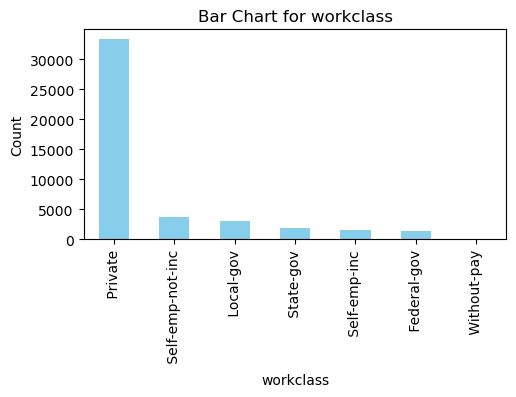

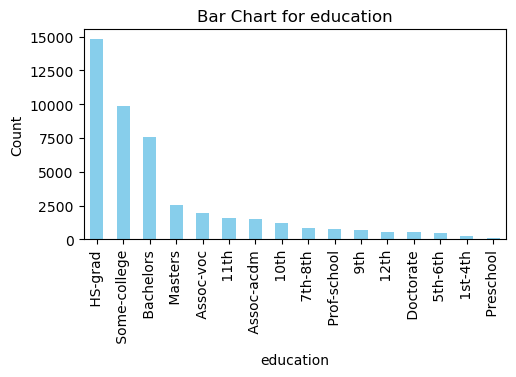

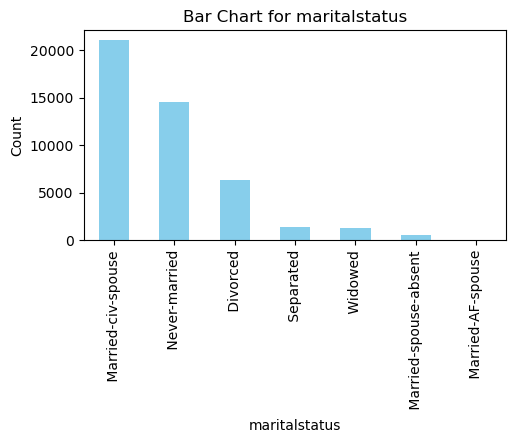

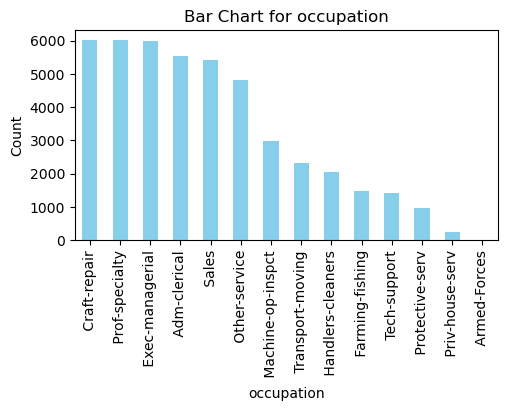

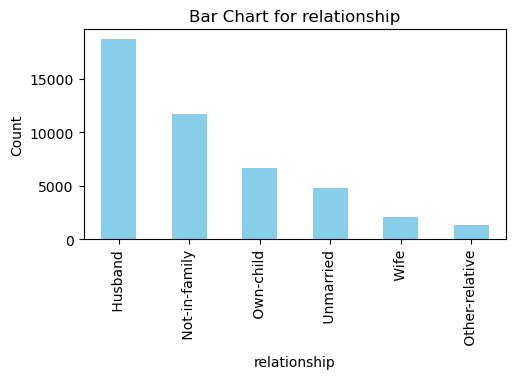

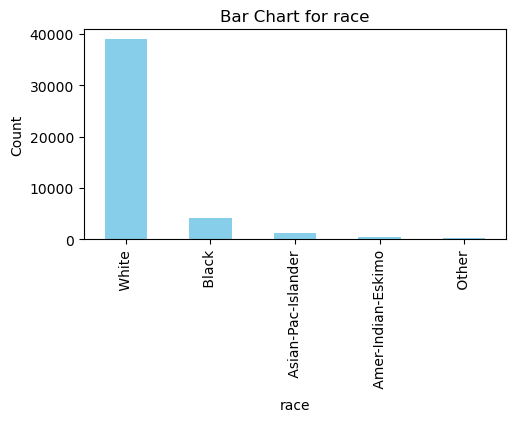

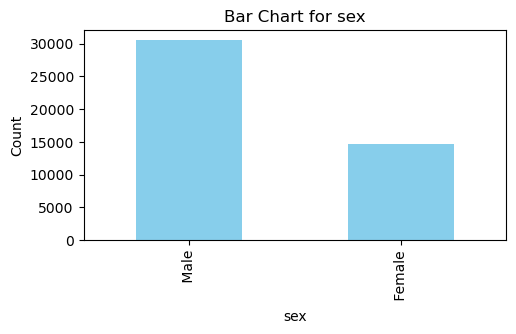

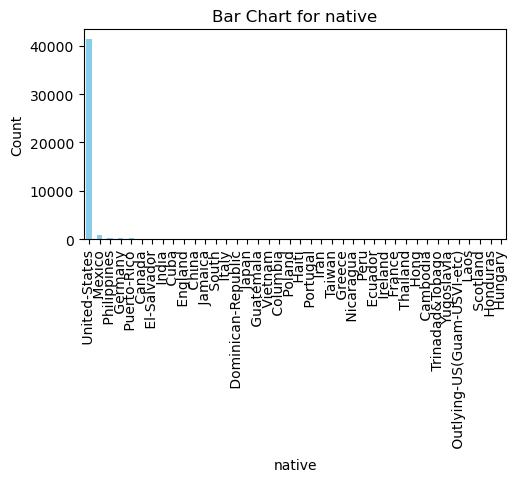

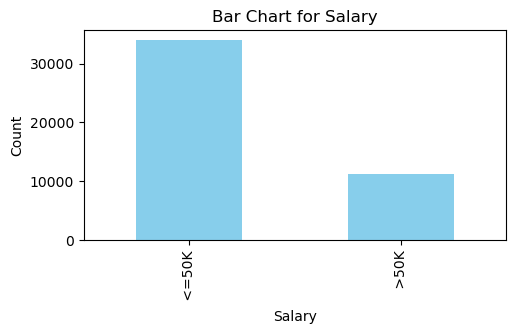

In [30]:
for category in categorical_features:
    plt.figure(figsize=(12, 6))
    
    # Bar Chart
    plt.subplot(2, 2, 1)
    df[category].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart for {category}')
    plt.xlabel(category)
    plt.ylabel('Count')

# From the above bar charts FOR WORK CLASS, we can say that most of the people are in private sector
# From the above bar charts FOR EDUCATION , we can say that most of the people are High school graduates and new to college and bachelors
# More people are from United states and white
# The people who are earning salary less than 50k are more when compared to people who earns greater than 50K

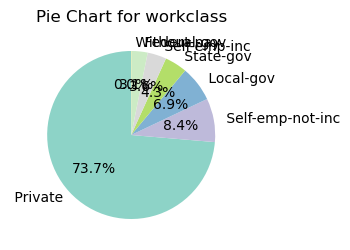

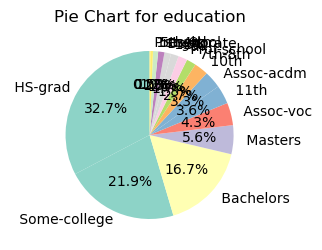

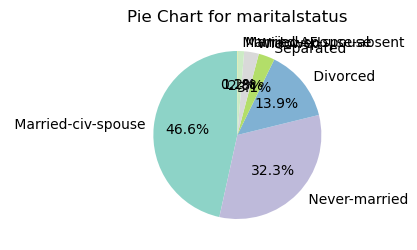

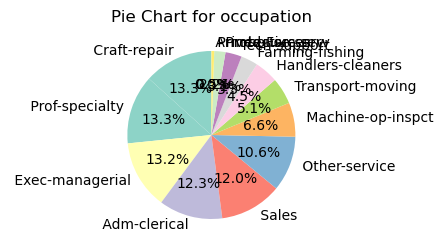

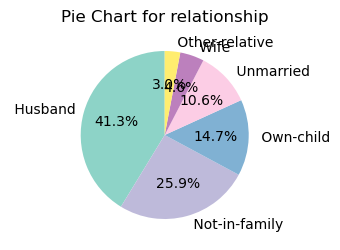

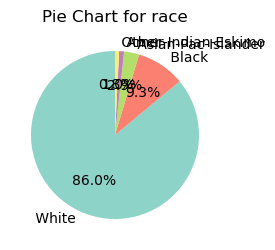

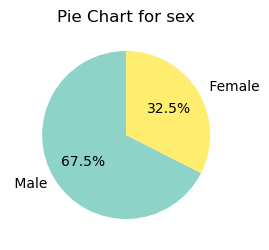

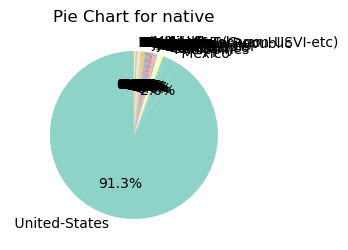

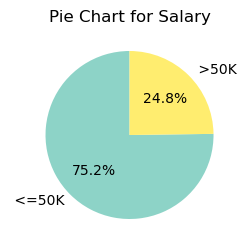

In [31]:
# Pie Chart
for category in categorical_features:
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 2)
    df[category].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
    plt.title(f'Pie Chart for {category}')
    plt.ylabel('')

# We can get the same assumption from the above pie charts

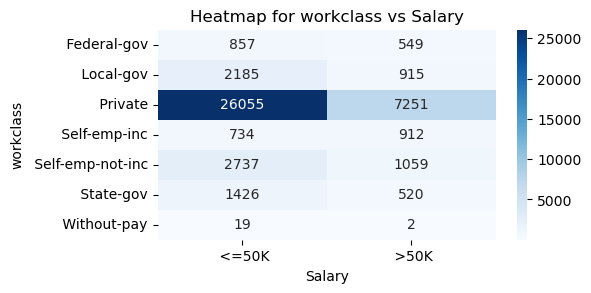

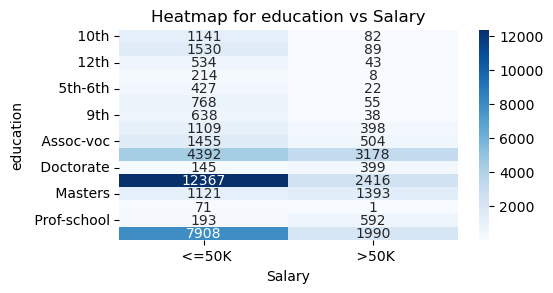

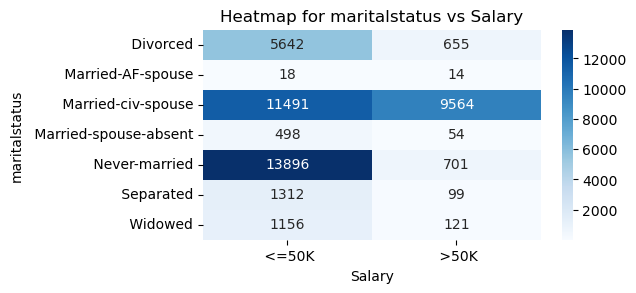

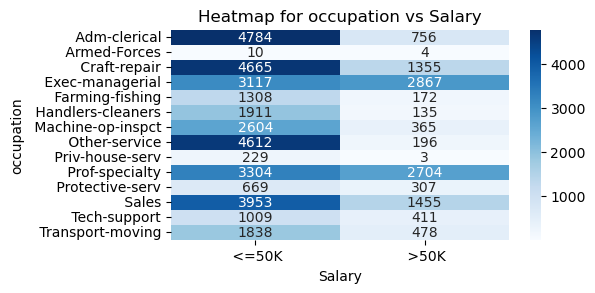

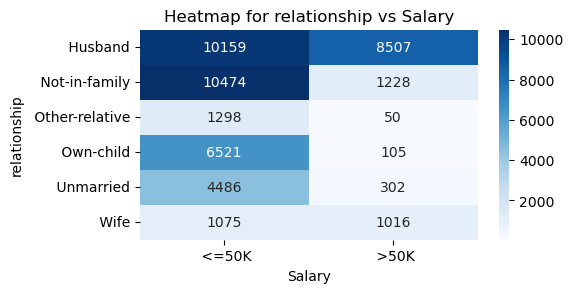

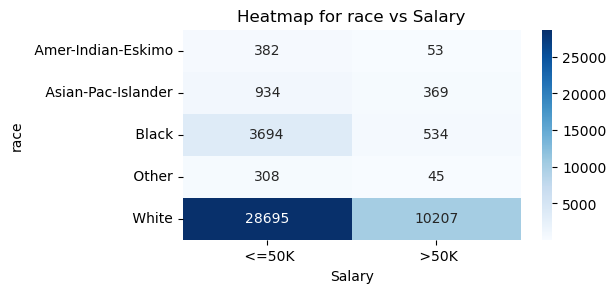

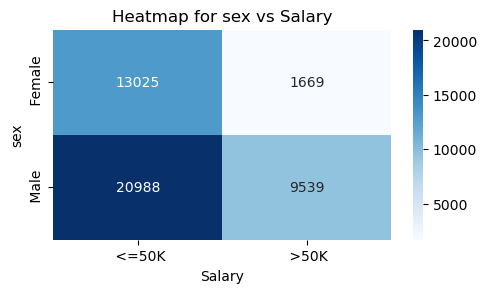

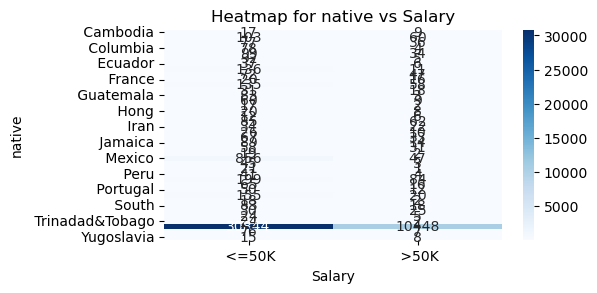

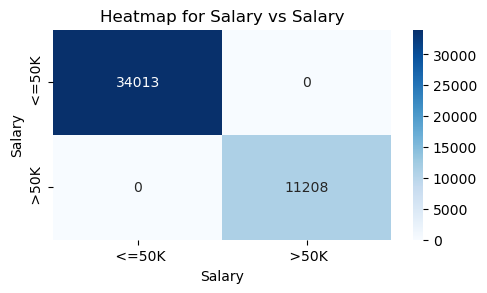

In [32]:
for category in categorical_features:
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 3)
    contingency_table = pd.crosstab(df[category], df['Salary'])
    sns.heatmap(contingency_table, cmap='Blues', annot=True, fmt='d')
    plt.title(f'Heatmap for {category} vs Salary')

<Figure size 1200x600 with 0 Axes>

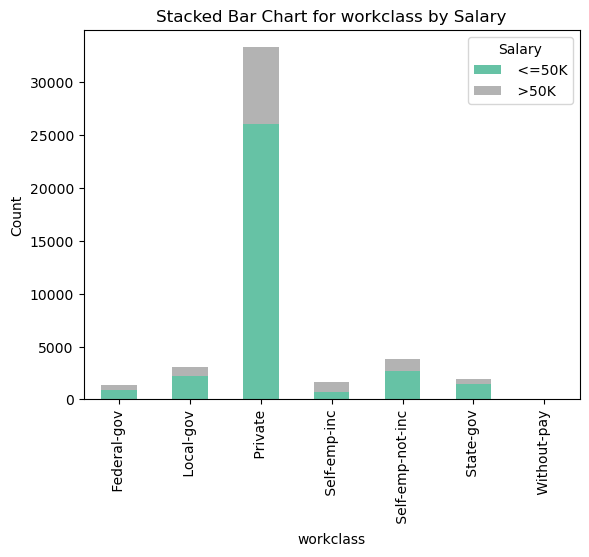

<Figure size 1200x600 with 0 Axes>

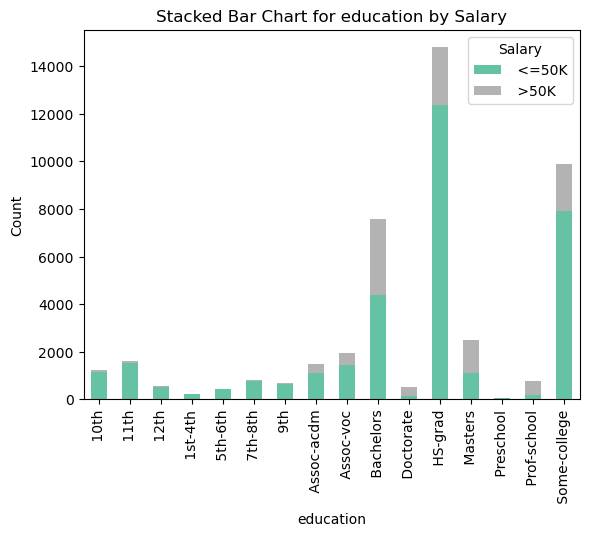

<Figure size 1200x600 with 0 Axes>

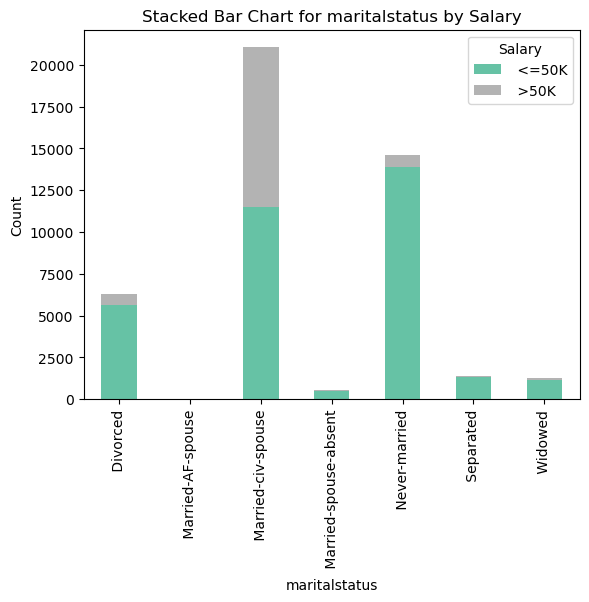

<Figure size 1200x600 with 0 Axes>

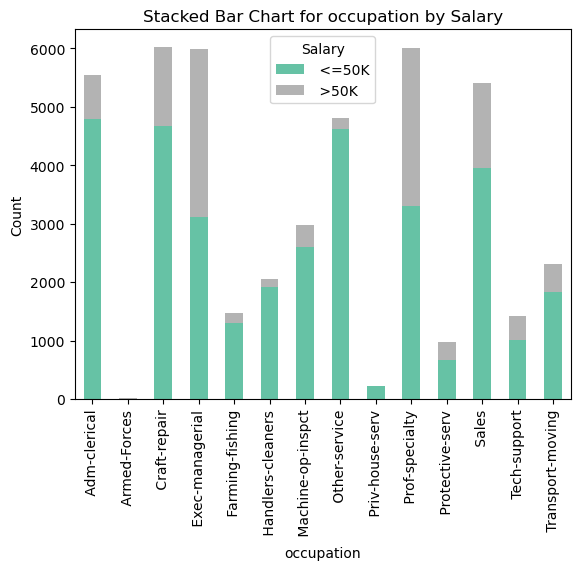

<Figure size 1200x600 with 0 Axes>

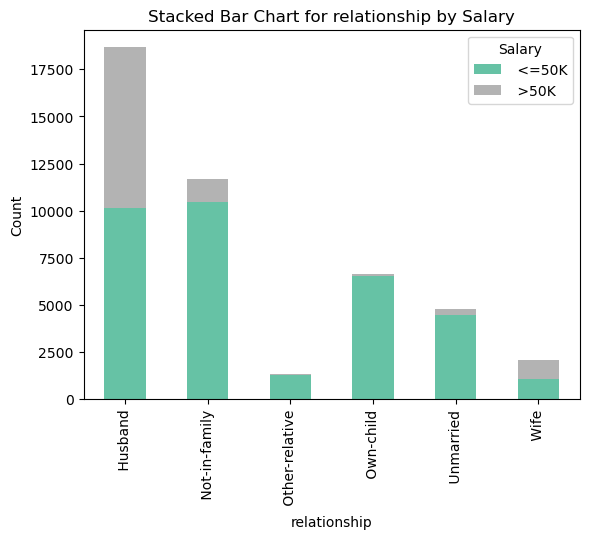

<Figure size 1200x600 with 0 Axes>

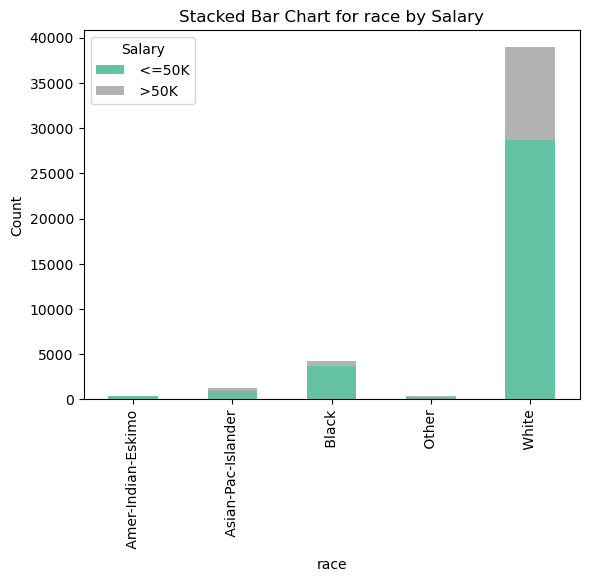

<Figure size 1200x600 with 0 Axes>

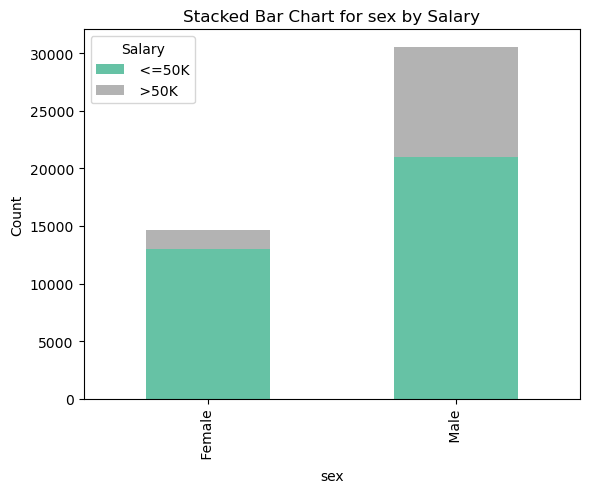

<Figure size 1200x600 with 0 Axes>

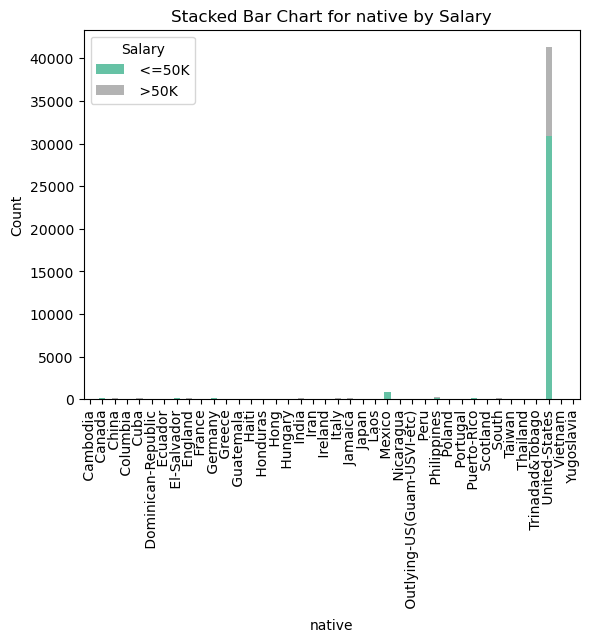

<Figure size 1200x600 with 0 Axes>

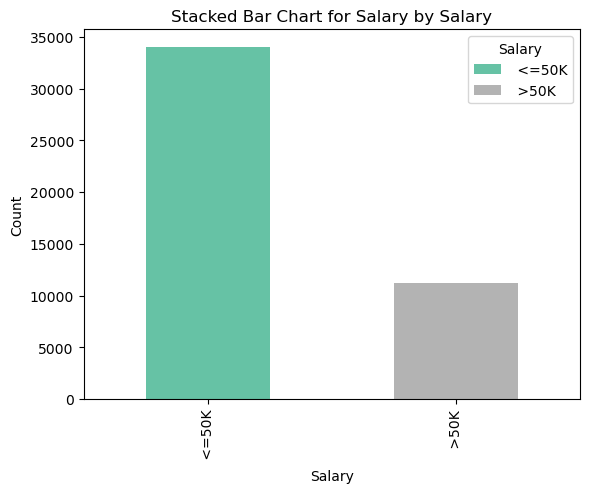

In [33]:
for category in categorical_features:
    plt.figure(figsize=(12, 6))
    contingency_table_gender = pd.crosstab(df[category], df['Salary'])
    contingency_table_gender.plot(kind='bar', stacked=True, colormap='Set2')
    plt.title(f'Stacked Bar Chart for {category} by Salary')
    plt.xlabel(category)
    plt.ylabel('Count')

# From the bar charts , we can see that private workers are earning more and when come to education HS-grad are earning more.
# When come to occupation the Excel-managirial and prof- speciality people are more who are earning more than 50K salary
# And when come to relation , the husbands and people who are nor in relation are earning more.
# And as usual white people are earning more 
# And male workers are more whwn compared to female
# Almost all the people are from US only
# And finally people earning ssalary of less than 50K are more when compared to people who are earning less than 50K

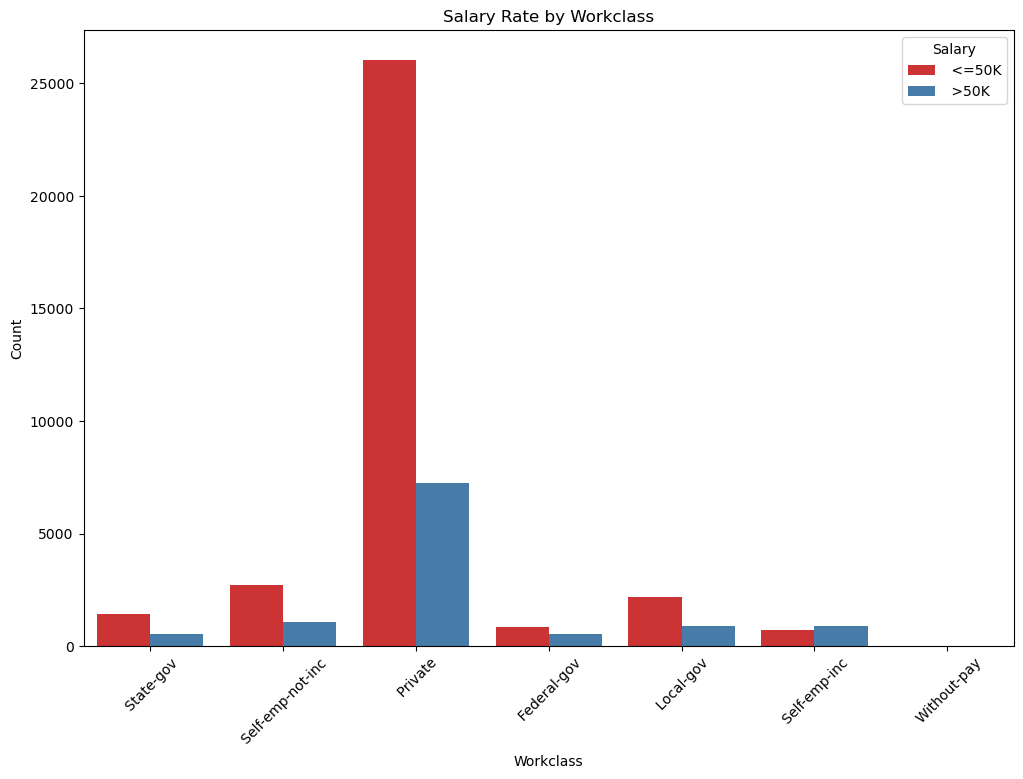

In [34]:
# Visualization of salary rate by work class
plt.figure(figsize=(12, 8))
sns.countplot(x='workclass', hue='Salary', data=df, palette='Set1')
plt.title('Salary Rate by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Salary', loc='upper right')
plt.show()

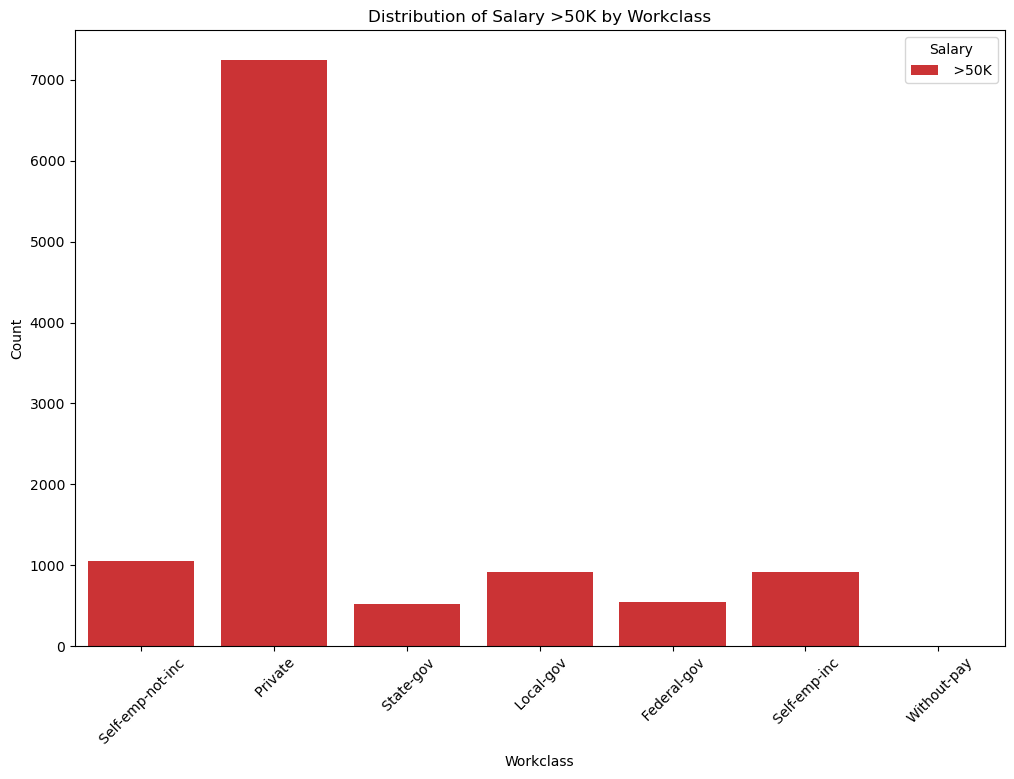

In [35]:
plt.figure(figsize=(12, 8))
sns.countplot(x='workclass', hue='Salary', data=df[df['Salary'] == ' >50K'], palette='Set1')
plt.title('Distribution of Salary >50K by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Salary', loc='upper right')
plt.show()

# Pre processing of data for model building

In [36]:
# Encoding of categorical features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# encoding with label_encoder object

df["education"]=label_encoder.fit_transform(df["education"])
df["workclass"]=label_encoder.fit_transform(df["workclass"])
df["maritalstatus"]=label_encoder.fit_transform(df["maritalstatus"])
df["sex"]=label_encoder.fit_transform(df["sex"])
df["race"]=label_encoder.fit_transform(df["race"])
df["occupation"]=label_encoder.fit_transform(df["occupation"])
df["relationship"]=label_encoder.fit_transform(df["relationship"])
df["native"]=label_encoder.fit_transform(df["native"])

In [37]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


# All categorical features are label encoded

In [38]:
# Converting string value into binary classes such as if ">50K" then classify it as '1' other wise 'O'
df['Salary'] = np.where(df['Salary'].str.contains(' >50K'),1,0)

In [39]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


# SCALING THE DATA

In [40]:
# IMPORT STANDARD SCALER
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [42]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.034190,5,9,1.128739,4,0,1,4,1,0.142884,-0.218728,-0.078121,37,0
1,0.866399,4,9,1.128739,2,3,0,4,1,-0.146735,-0.218728,-2.326714,37,0
2,-0.041466,2,11,-0.438118,0,5,1,4,1,-0.146735,-0.218728,-0.078121,37,0
3,1.093365,2,1,-1.221546,2,5,0,2,1,-0.146735,-0.218728,-0.078121,37,0
4,-0.798019,2,9,1.128739,2,9,5,2,0,-0.146735,-0.218728,-0.078121,4,0


# Data has been scaled

In [43]:
# Segregate the data into independent and target variables
x = df.drop('Salary',axis=1)
y = df['Salary']

In [44]:
# Split the data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [45]:
# Build a SVM with default parameters
svcl = SVC()
svcl.fit(x_train, y_train)

SVC()

In [46]:
pred_train = svcl.predict(x_train)

In [47]:
pred_train[:5]

array([0, 0, 0, 0, 1])

In [48]:
pred_test = svcl.predict(x_test)

In [49]:
pred_test[:5]

array([0, 0, 0, 0, 0])

In [50]:
# print the classification report for train and test data performance
from sklearn.metrics import classification_report

In [51]:
# print the classification report of train data
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     23809
           1       0.84      0.28      0.42      7845

    accuracy                           0.81     31654
   macro avg       0.82      0.63      0.65     31654
weighted avg       0.81      0.81      0.77     31654



In [52]:
# print the classification report of test data
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     10204
           1       0.84      0.28      0.42      3363

    accuracy                           0.81     13567
   macro avg       0.82      0.63      0.65     13567
weighted avg       0.81      0.81      0.77     13567



# The model is more biased towards majority class. The model is able to predict the majority class well. But when come to minority class the model performance is poor. This can be due to imbalanced data .

In [53]:
x = df.drop(['Salary'], axis=1)
y = df['Salary']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0,stratify=y)

#  Hybridization oversampling SMOTE + Tomek Links

In [57]:
from collections import Counter
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 23809, 1: 7845})
After Counter({0: 23176, 1: 23176})


In [58]:
x_train,x_test,y_train,y_test = train_test_split(x_train_smtom,y_train_smtom,test_size=0.3,
                                                 random_state=1, stratify=y_train_smtom)

counter = Counter(y_train_smtom)
print('Before',counter)
counter = Counter(y_train)
print('After',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Before Counter({0: 23176, 1: 23176})
After Counter({1: 16223, 0: 16223})
Shape of X_train:  (32446, 13)
Shape of X_test:  (13906, 13)
Shape of y_train:  (32446,)
Shape of y_test (13906,)


In [59]:
# initiating the model with kernel tric
model = SVC(kernel='linear', probability=True)

# fit the model
model.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [60]:
pred_train = model.predict(x_train)

print('SVC Model using Linear Kernel accuracy score: {0:0.4f}'. format(accuracy_score(y_train, pred_train)))

SVC Model using Linear Kernel accuracy score: 0.7775


In [61]:
# print the classification report

print('SVM Linear Kernel Model','\n',classification_report(y_train, pred_train))

SVM Linear Kernel Model 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77     16223
           1       0.77      0.80      0.78     16223

    accuracy                           0.78     32446
   macro avg       0.78      0.78      0.78     32446
weighted avg       0.78      0.78      0.78     32446



In [62]:
pred_test = model.predict(x_test)

print('SVC Model using Linear Kernel accuracy score on test : {0:0.3f}'. format(accuracy_score(y_test, pred_test)))

SVC Model using Linear Kernel accuracy score on test : 0.780


In [63]:
# print the classification report

print('SVM Linear Kernel Model on test','\n',classification_report(y_test, pred_test))

SVM Linear Kernel Model on test 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      6953
           1       0.77      0.80      0.78      6953

    accuracy                           0.78     13906
   macro avg       0.78      0.78      0.78     13906
weighted avg       0.78      0.78      0.78     13906



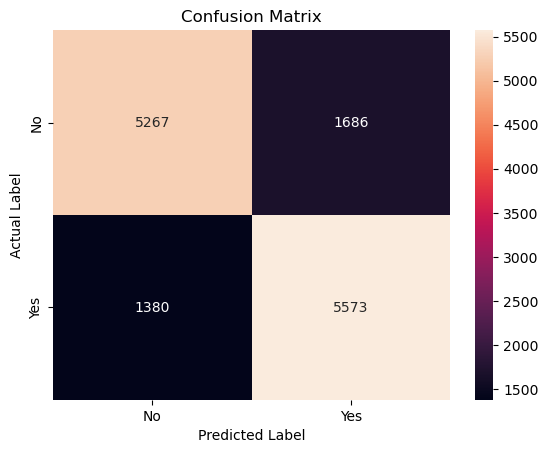

In [64]:
# plot confusion matrix to describe the performance of classifier.

cm_df=confusion_matrix(y_test, pred_test)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

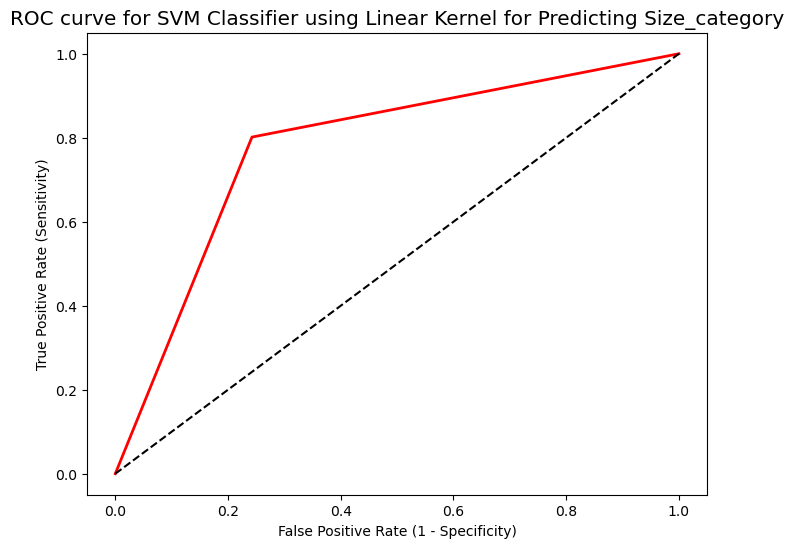

ROC AUC : 0.7795


In [65]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC_AUC = roc_auc_score(y_test, pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

# The model performance on train and test data is almost similar. The model is not a overfitted model.

 # After over sampling by using Hybridization oversampling SMOTE + Tomek Links, the model performance is good and we will try with other sampling techniques and kernels

#  Similarly we can use the SMOTE Oversampling technique also, the following code is to be written for building a model

In [ ]:
x = df.drop(['Salary'], axis=1)
y = df['Salary']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0,stratify=y)

In [ ]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_train_sm,y_train_sm,test_size=0.3,random_state=1, stratify=y_train_sm)

counter = Counter(y_train_sm)
print('Before',counter)
counter = Counter(y_train)
print('After',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

In [ ]:
# initiating the model with kernel tric
model = SVC(kernel='linear', probability=True)

# fit the model
model.fit(x_train, y_train)

# We can try with the other sampling techniques and hyper parameter tuning for the improve of the performance of the model as follows

In [ ]:
# create a parameter grid for SVC for GridSearchCV
param_grid = {'C':[0.01,0.1,1,10],
             'gamma':[1,0.1,0.01,0.001],
             'kernel':['linear','rbf']}

In [ ]:
# create a K-fold object to use in gridsearch cv
kf = KFold(n_splits=10,shuffle=True,random_state=42)

In [ ]:
# instantiate a SVC model and GridSearchCV object and run the grid search 
svcl = SVC()
grid_search = GridSearchCV(svcl,param_grid,cv=kf,scoring='accuracy')

In [ ]:
grid_search.fit(x_train_scaled,y_train)

In [ ]:
# # identify the best parameters
grid_search.best_params_

In [ ]:
# # access the best model
best_model = grid_search.best_estimator_

In [ ]:
# # get the predictions from the best model
pred_train = grid_search.predict(x_train_scaled)
pred_test = grid_search.predict(x_test_scaled)

In [ ]:
# print the classification report of train data
print(classification_report(y_train,pred_train))

# The above code will give the best parameters and best model for further improving the performance of the model.Due to limited resources not able to proceed further.